In [227]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

path = "../folder/"
result = []

for file in os.listdir(path):
    try:
        if file.endswith(".jpg"):
            result.append(str(file))
    except:
        ""
        
# Columns name
col = []
for i in range(0,1296):
    col.append("pixel" + str(i))

# Get label of the sample
label = []
s = result[0].rstrip(".jpg")
label.append(''.join([i for i in s if not i.isdigit()])[4:])
data = Image.open(path+result[0]).convert('L').resize((36,36))
data = np.asarray(data).flatten()

for img in result[1:]:
    label.append(''.join([i for i in img.rstrip(".jpg") if not i.isdigit()])[4:])
    temp = Image.open(path+img).convert('L').resize((36,36))
    temp = np.asarray(temp).flatten()
    data = np.vstack([data,temp])
    
df = pd.DataFrame(data, columns=col)
df["label"] = label
# img = Image.open(path+result[0]).convert('L')  # convert image to 8-bit grayscale

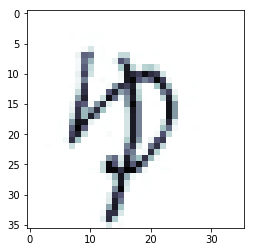

In [224]:
plt.imshow(np.array(df.iloc[999,:-1].as_matrix().reshape((36,36)), dtype=float), cmap="bone_r")
plt.show()

In [230]:
target = df["label"]
train = df.drop("label",1)

In [252]:
trainX, testX, trainY, testY = train_test_split(df, target, train_size=0.8, random_state=0)

In [259]:
trainX = trainX.drop("label",1)
testX = testX.drop("label",1)

In [330]:
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, trainX, trainY, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

print(cv_scores)

[0.76062849172742109, 0.73693179041561718, 0.72125268858550706, 0.70049885405978995, 0.6806129665591516, 0.64814715644590648, 0.64086458973562688, 0.60019738018480262, 0.58713757729284777, 0.56322548573953257]


In [336]:
# k=1 the optimum k in cv10
pca = PCA(n_components=50)
pca.fit(train)
transform_train = pca.transform(trainX)
transform_test = pca.transform(testX)

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(transform_train, trainY)
results=clf.predict(transform_test)

In [337]:
sum(results == testY)/200

0.82499999999999996